<a href="https://colab.research.google.com/github/TusharPaul01/Car-Angle-Classification/blob/main/CAR_angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Tushar Paul
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/MyDrive/dataset'

In [3]:
import os
import shutil

# Define paths to source directory and destination directories for each category
source_dir = "/content/drive/MyDrive/dataset"
destination_dir = "/content/drive/MyDrive/dataset/Categorized"

# Create destination directories if they don't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# List all files in the source directory
files = os.listdir(source_dir)

# Define categories
categories = ['0','130','180', '230', '270', '320', '40','90',]

# Iterate over each file and move them to the corresponding category directory
for file in files:
    for category in categories:
        if category in file:
            category_dir = os.path.join(destination_dir, category)
            if not os.path.exists(category_dir):
                os.makedirs(category_dir)
            # Move the file to the category directory
            shutil.move(os.path.join(source_dir, file), category_dir)
            break  # Break the loop once the file is moved to its category directory

In [7]:
import tensorflow as tf

# Define parameters
image_height = 224
image_width = 224
batch_size = 32

# Define data generator
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    validation_split=0.2  # Split data into training and validation sets
)

# Define path to dataset directory
dataset_dir = "/content/drive/MyDrive/dataset/Categorized/0"

# Load training data
train_generator = data_generator.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' for multi-class classification
    subset='training'  # training data
)

# Load validation data
validation_generator = data_generator.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use validation data
)

# Print class indices
print("Class indices:", train_generator.class_indices)

Found 21636 images belonging to 8 classes.
Found 5406 images belonging to 8 classes.
Class indices: {'0': 0, '130': 1, '180': 2, '230': 3, '270': 4, '320': 5, '40': 6, '90': 7}


In [8]:
# Define and compile CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=3,        # Increase epoch to increase accuracy & reduce losses
    validation_data=validation_generator
)

677/677 [==============================] - 9549s 14s/step - loss: 0.4601 - accuracy: 0.8480 - val_loss: 0.3103 - val_accuracy: 0.8938


In [9]:
# Define the path where want to save the model
model_save_path = "/content/drive/MyDrive/trained_model.h5"

# Save the model
model.save(model_save_path)

print("Model saved successfully at:", model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: /content/drive/MyDrive/trained_model.h5


In [10]:
from tensorflow.keras.models import load_model
# Load the saved model
loaded_model = load_model(model_save_path)

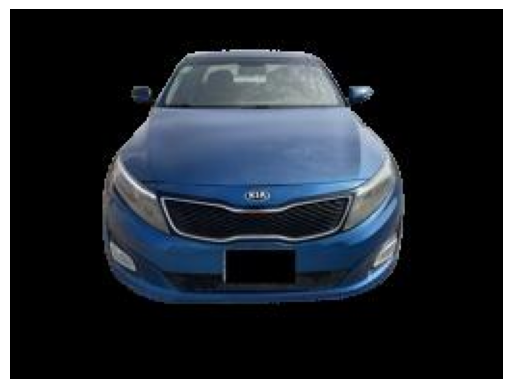

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#img_name = '2398.jpg'  # Replace 'example_image.jpg' with the name of your image file
img = mpimg.imread("/content/drive/MyDrive/dataset/Categorized/0/0/100090.jpeg")
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

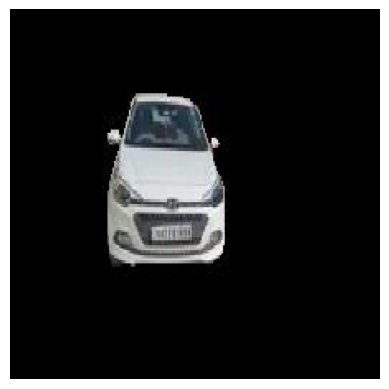

1/1 [==============================] - 0s 54ms/step
Predicted angle: 0


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to the image you want to test
image_path = "/content/drive/MyDrive/dataset/Categorized/0/0/100010.jpeg"

# Load the image
img = image.load_img(image_path, target_size=(image_height, image_width))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values to [0, 1]

plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions[0])
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

print("Predicted angle:", predicted_class)

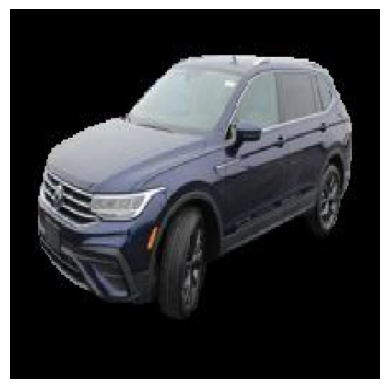

1/1 [==============================] - 0s 95ms/step
Predicted angle (degrees): 40


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to the image you want to test
image_path = "/content/drive/MyDrive/dataset/Categorized/0/40/444905.jpeg"

# Load the image
img = image.load_img(image_path, target_size=(image_height, image_width))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values to [0, 1]

plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions[0])
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

print("Predicted angle (degrees):", predicted_class)

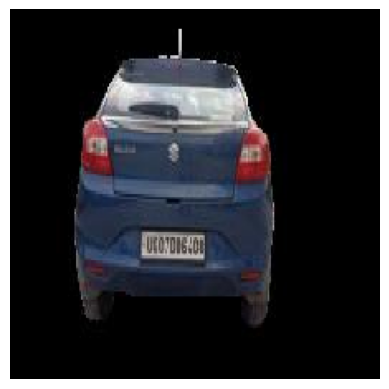

1/1 [==============================] - 0s 49ms/step
Predicted angle (degrees): 180


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the path to the image you want to test
image_path = "/content/drive/MyDrive/dataset/Categorized/0/180/101579.jpeg"

# Load the image
img = image.load_img(image_path, target_size=(image_height, image_width))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize pixel values to [0, 1]

plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.show()

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class_index = np.argmax(predictions[0])
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index]

print("Predicted angle (degrees):", predicted_class)